<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch7_TD_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch7 - Notebook : TD - Convergence d'une suite réelle**
## **Ex 1 : Dynamique des populations : modèles en temps discret**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [ ]:
import matplotlib.pyplot as plt

### 1. **Modèle malthusien**

--> La population évolue, sans prédation, dans un univers infini aux ressources infinies.

<img src="https://img.pixers.pics/pho_wat(s3:700/FO/71/30/78/27/700_FO71307827_d29e1eadb89ef78d89c87f09caa71ad7.jpg,700,667,cms:2018/10/5bd1b6b8d04b8_220x50-watermark.png,over,480,617,jpg)/papiers-peints-grande-nebuleuse-d-39-orion.jpg.jpg" width="280" height="250" align = "right"/>


Pour $t \in \mathbb{N}$, $N_t$ désigne la population à l'instant t, en unités de population (individus ou millers ou millions, etc. voire en kg !) 

Principe du modèle : "l'accroissement de la population est proportionnel à la population"

$$\Delta t = N_{t+1} - N_t = r . N_t~~(*)$$ 

où $r$ désigne le taux d'accroissement, constant.

Remarque : la relation (*) équivaut à : $N_{t+1} = \left ( 1+r \right ) . N_t$ (suite géométrique de raison $\left ( 1+r \right )$


In [ ]:
def malthus(r, N0=10, temps = range(1,101)) :
    '''Cette fonction reçoit    r, flottant, taux d'accroissement de la population
                                N0, entier, 1er terme de la suite, par défaut : 10 unités
                                temps, liste, intervalle des temps, par défaut : [[0,10]]                                
       calcule les effectifs successifs de la population, et renvoie leur liste'''

    N = [N0]
    Nt = N0
    for t in temps :
        Nt = (1+r) * Nt
        N.append(Nt)
    return N


In [ ]:
temps = range(101)


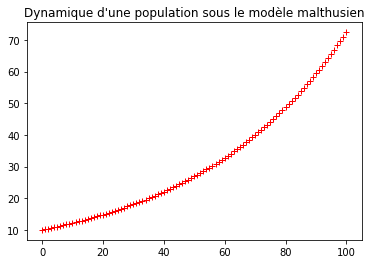

In [ ]:
# r = 0.02
pop1 = malthus(0.02)
plt.plot(temps, pop1, 'r',marker = "+", label = "r > 0",linestyle = 'None')
plt.title("Dynamique d'une population sous le modèle malthusien")

plt.show()

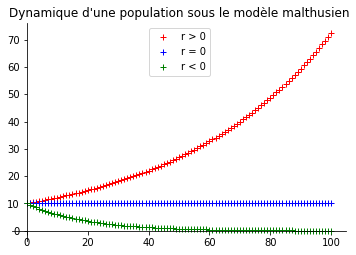

In [ ]:
pop1 = malthus(0.02)
pop2 = malthus(0)
pop3 = malthus(-0.05)

plt.plot(temps, pop1, 'r',marker = "+", label = "r > 0",linestyle = 'None')
plt.plot(temps, pop2, 'b',marker = "+", label = "r = 0",linestyle = 'None')
plt.plot(temps, pop3, 'g',marker = "+", label = "r < 0",linestyle = 'None')

plt.title("Dynamique d'une population sous le modèle malthusien")

# ajustement des paramètres des axes (centrage, couleur, etc.)
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.legend(loc = 9)

plt.show()

### **2. Modèle de Verlhust**

--> Dynamique d'une population sans prédateur, en milieu fermé


<img src="https://img.20mn.fr/jjNQ--IUT42woVf_nIEh4A/768x492_minions" width="400" height="280" align = "right"/>
Lorsque l'espace n'est pas extensible, Verlhust a donné le modèle suivant, pour $k \in \mathbb{N}$ : 

$$N_{k+1}  =  N_k . \left ( 1 + r - r . \frac{N_k}{K}\right )~~(**)$$ 

où :     
* r est le taux d'accroissement naturel de la population (celui du modèle exponentiel de Malthus)
* K, la capacité d'accueil du milieu




In [ ]:
# La capacité d'accueil du milieu est de 100 mg
K = 100


In [ ]:
def suiteN(N0, r, n) : 
    '''Cette fonction reçoit    * N0, entier, population initiale
                                * r, flottant, lié au taux d'accroissement naturel de la population
                                * n, entier : nombre de générations
    et retourne la liste des populations successives'''
    
    N = [N0]
    Nk = N0
    for k in range(1,n+1) :
        Nk = Nk*(1+r - r * Nk/K)
        N.append(Nk)
    return N


**N0 = 1, r = 0.8**

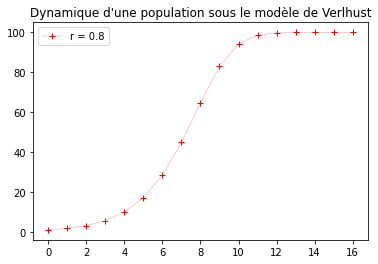

In [ ]:
N0 = 1
r = 0.8
n = 16

temps = range(n+1)
pop1 = suiteN(N0, r, n)

plt.plot(temps, pop1, 'r',marker = "+", label = "r = " + str(r), linewidth = 0.2)
plt.title("Dynamique d'une population sous le modèle de Verlhust")
plt.legend(loc = 0)
plt.show()

**N0 = 150, r = 0.8**

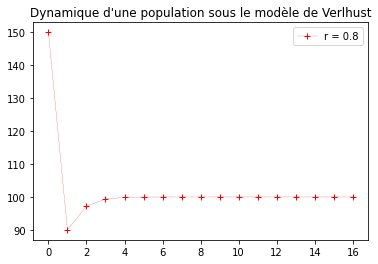

In [ ]:
N0 = 150
r = 0.8
n = 16

temps = range(n+1)
pop1 = suiteN(N0, r, n)

plt.plot(temps, pop1, 'r',marker = "+", label = "r = " + str(r), linewidth = 0.2)
plt.title("Dynamique d'une population sous le modèle de Verlhust")
plt.legend(loc = 0)
plt.show()

**Comparaison de la dynamique pour diverses valeurs de r**


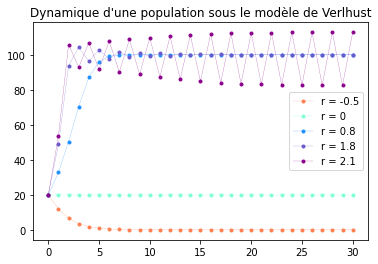

In [ ]:
N0 = 20
liste_r = [-0.5, 0, 0.8, 1.8, 2.1]
liste_couleur = ['coral', 'aquamarine','dodgerblue','slateblue','darkmagenta']
n = 30

temps = range(n+1)
for k in range(len(liste_r)) :
    r = liste_r[k]
    pop1 = suiteN(N0, r, n)
    plt.plot(temps, pop1, color = liste_couleur[k],marker = ".", label = "r = " + str(r), linewidth = 0.2)
plt.title("Dynamique d'une population sous le modèle de Verlhust")
plt.legend(loc = 0)
plt.show()

**Observations :**

Pour r négatif, la population s'éteind, et pour r nul, elle est stationnaire sur sa valeur initiale, logique.

Pour r = 0.8, la population croît vers la limite K, capacité d'accueil du milieu.

Pour r = 1.8, de même, si ce n'est que la population oscille autour de la capacité d'accueil : la dépassant une génération sur deux, elle tue alors plus d'individus qu'elle n'en génère pour revenir sous la capacité d'accueil, où la croissance trop forte la fait à nouveau dépasser, et ainsi de suite, mais le phénomène se stabilise.

Pour r = 2.5, la population oscille également, mais sans jamais s'équilibrer, il semble que les termes de rang pair se stabilisent vers une limite supérieure à K, et les termes de rang impair, sur une limite inférieure à K.

**Calcul du seuil d'instabilité**

In [ ]:
from math import abs

* **Stabilisation ou non selon les valeurs de r**

In [ ]:
def limite(r, N0 = 1, epsilon= 10**-12) :
    Nprec = 0
    N = N0
    k = 0
    while abs(N - Nprec)> epsilon and k <= 50000 :
        k = k+1
        Nprec = N
        N = N = N*(1 + r - r*N/K)
        
    return k!=50001 # vrai si stabilisation, faux sinon

In [ ]:
if limite(1.8) :
    print('Stabilisation à saturation')
else :
    print('instabilité')

Stabilisation à saturation


In [ ]:
if limite(2.5) :
    print('Stabilisation à saturation')
else :
    print('Instabilité')

Instabilité


* **Recherche du seuil**

In [ ]:
r = 1
pas = 0.05
while limite(r) :
    r = r + pas

print("Jusqu'à r = " + str(r - pas)+ ", stabilisation à saturation, après r = "+str(r) + " : instabilité")


Jusqu'à r = 1.9500000000000008, stabilisation à saturation, après r = 2.000000000000001 : instabilité


## **Ex2 : Système prédateurs-proies, modèle de Lotka et volterra**

<img src="https://drive.google.com/uc?id=1aCE24N6haLgiczWkJEmIenmpaaOnpCvq" width="400" height="280" align = "right"/>

$x_n$ : nombre de proies à l'étape n

$y_n$ : nombre de prédateurs à l'étape n

### **1er modèle, simple**
Dans ce modèle, les ressources des proies sont illimitées, si bien que sans prédation, la dynamique de leur population serait exponentielle.

$$\left\{\begin{matrix}
x_{n+1} & -  & x_n & = & \left (a - b . y_n \right ). x_n\\
y_{n+1} &  - & y_n  & = & \left (c . x_n - d \right ). y_n \\
\end{matrix}\right.$$




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def lotka_volterra(x0,y0,a,b,c,d,n) :
    '''Cette fonction reçoit    * 2 entiers x0 et y0 : conditions initiales
                                * 4 flottants, a, b, c, d: paramètres du système
                                * 1 entier n : nombre d'itérations
       et retourne la liste des populations successives X et Y'''
    X = [x0]
    Y = [y0]
    xk = x0
    yk = y0

    for k in range(1,n+1) :
        xk = (1 + a - b*yk)*xk
        yk = (1 + c*xk - d)*yk
        X.append(xk)
        Y.append(yk)
    return X, Y
        
    

In [ ]:
x0 = 53000
y0 = 9000

a = 0.2 #0.09
b = 10**-5
c = 5*10**-6
d = 0.25

n = 150

X, Y = lotka_volterra(x0,y0,a,b,c,d,n)

* **Graphique chronologique**

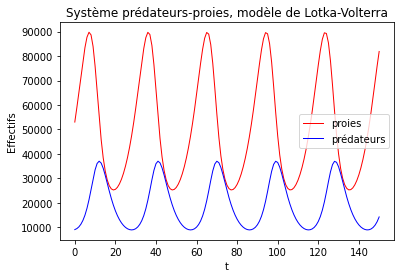

In [ ]:
temps = range(n+1)

plt.plot(temps, X, color = 'red', label = "proies" , linewidth = 1)
plt.plot(temps, Y, color = 'blue', label = "prédateurs" , linewidth = 1)
plt.title("Système prédateurs-proies, modèle de Lotka-Volterra")

plt.xlabel('t')
plt.ylabel('Effectifs')
plt.legend(loc = 0)
plt.show()

* **Diagramme de phase**

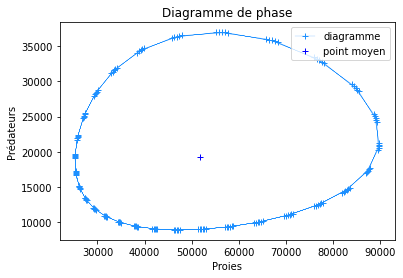

In [ ]:
plt.plot(X, Y, color = 'dodgerblue', marker = "+", linewidth = 0.2, label = 'diagramme')

plt.title('Diagramme de phase')
plt.xlabel('Proies')
plt.ylabel('Prédateurs')

xmoy = np.mean(X)
ymoy = np.mean(Y)
plt.plot(xmoy, ymoy, 'b', marker = "+", label = "point moyen", linewidth = 0)

plt.legend(loc = 1)
plt.show()

### **2ème modèle plus réaliste : les ressources des proies diminuent en proportionnellement à leur population**

Le nombre de proies se trouve diminué d'une quantité proportionnelle au nombre de proies :**

$$\left\{\begin{matrix}
x_{n+1} & -  & x_n & = & \left (a - b . y_n - k . x_n\right ). x_n\\
y_{n+1} &  - & y_n  & = & \left (c . x_n - d \right ). y_n \\
\end{matrix}\right.$$

In [ ]:
def lotka_volterra2(x0,y0,a,b,c,d,K,n) :
    '''Cette fonction reçoit    * 2 entiers x0 et y0 : conditions initiales
                                * 5 flottants, a, b, c, d, k : paramètres du système
                                * 1 entier n : nombre d'itérations
       et retourne la liste des populations successives X et Y'''
    X = [x0]
    Y = [y0]
    xk = x0
    yk = y0
    
    for k in range(1,n+1) :
        xk = (1 + a - b*yk - K*xk)*xk
        yk = (1 + c*xk - d)*yk
        X.append(xk)
        Y.append(yk)
    return X, Y
        

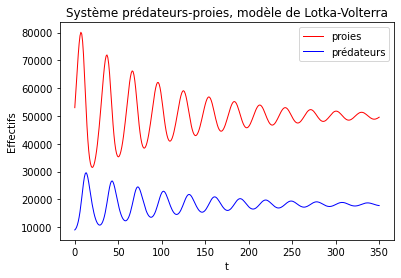

In [ ]:
x0 = 53000
y0 = 9000

a = 0.2 #0.09
b = 10**-5
c = 5*10**-6
d = 0.25
n = 350
temps = range(n+1)

K =  36*10**-8 # 8*10**-7  ou   36*10**-8  ou   169*10**-8
X,Y = lotka_volterra2(x0,y0,a,b,c,d,K,n)

plt.plot(temps, X, color = 'red', label = "proies" , linewidth = 1)
plt.plot(temps, Y, color = 'blue', label = "prédateurs" , linewidth = 1)
plt.title("Système prédateurs-proies, modèle de Lotka-Volterra")

plt.xlabel('t')
plt.ylabel('Effectifs')
plt.legend(loc = 0)
plt.show()

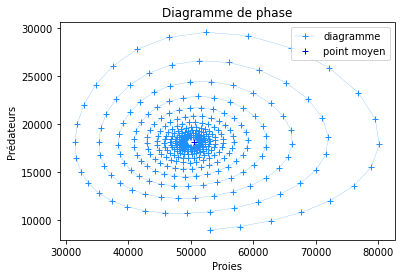

In [ ]:
plt.plot(X, Y, color = 'dodgerblue', marker = "+", linewidth = 0.2, label = 'diagramme')

plt.title('Diagramme de phase')
plt.xlabel('Proies')
plt.ylabel('Prédateurs')

xmoy = np.mean(X)
ymoy = np.mean(Y)
plt.plot(xmoy, ymoy, 'b', marker = "+", label = "point moyen", linewidth = 0)

plt.legend(loc = 1)
plt.show()

Tester ce modèle sur NetLogo (langage de programmation multi-agent), en ligne ici : 

(possibilité d'aller explorer le code... recommandé pour les curieux !!!)

http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/IABM%20Textbook/chapter%204/Wolf%20Sheep%20Simple%205.nlogo 

ou en téléchargeant le logiciel, fichier présent dans *Models Library - IABM TextBook - Wolf Sheep Simple 5*



<img src="https://upload.wikimedia.org/wikipedia/commons/5/5c/Netlogo-ui.png" width="500" height="350" align = "center"/>